# Applying ML

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
X,y = make_moons(400, noise = 0.1)

In [3]:
X.shape

(400, 2)

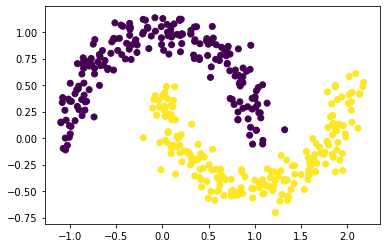

In [4]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [5]:
from matplotlib.colors import ListedColormap
def plotBoundary(pred):
    x1 = np.arange(min(X[:,0]) - 1, max(X[:,0]) + 1, 0.01)
    x2 = np.arange(min(X[:,1]) - 1, max(X[:,1]) + 1, 0.01)
    xx, yy = np.meshgrid(x1, x2)
    x = np.array([xx.flatten(), yy.flatten()]).T
    z = pred(x)
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap = ListedColormap(('red','blue')))
    plt.scatter(X[:,0], X[:,1], c = y)
    plt.show()

In [6]:
logistic = LogisticRegression()

In [7]:
logistic.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

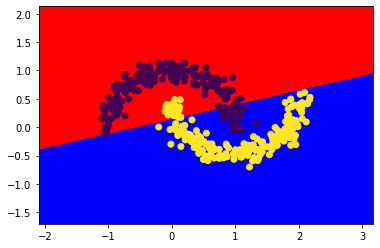

In [8]:
plotBoundary(logistic.predict)

In [9]:
svc = SVC()

In [10]:
svc.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

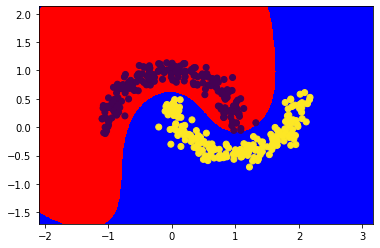

In [12]:
plotBoundary(svc.predict)

# Applying Neural Network

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
def derivativeSigmoid(x):
    return x * (1 - x)

In [15]:
def nn_predict(X,model):
    wh, bh, wout, bout = model['wh'], model['bh'],model['wout'],model['bout']
    a1 = np.dot(X, wh) + bh
    z1 = sigmoid(a1)
    a2 = np.dot(z1,wout) + bout
    output = sigmoid(a2)
    return output

In [16]:
def build_model(input_neurons,hidden_neurons,output_neurons):
    wh = np.random.uniform(size = (input_neurons, hidden_neurons))
    bh = np.random.uniform(size = (1, hidden_neurons))
    wout = np.random.uniform(size = (hidden_neurons, output_neurons))
    bout = np.random.uniform(size = (1, output_neurons))

    for i in range(epochs):
        # feedforward
        fx = np.dot(X, wh) + bh
        hidden_layer = sigmoid(fx)
        fx1 = np.dot(hidden_layer, wout) + bout
        output = sigmoid(fx1)

        # backpropagation
        error_output = y.reshape(-1,1) - output
        slope_output = derivativeSigmoid(output)
        delta_output = error_output * slope_output

        hidden_error = delta_output.dot(wout.T)
        slope_hidden = derivativeSigmoid(hidden_layer)
        delta_hidden = hidden_error * slope_hidden

        wout += hidden_layer.T.dot(delta_output) * alpha
        bout += np.sum(delta_output) * alpha
        wh += X.T.dot(delta_hidden) * alpha
        bh += np.sum(delta_hidden) * alpha
        
    model = {'wh':wh, 'bh':bh, 'wout':wout, 'bout':bout}
    return model

In [17]:
input_neurons = X.shape[1]
hidden_neurons = 3
output_neurons = 1
epochs = 10000
alpha = 0.1

In [18]:
model = build_model(input_neurons, hidden_neurons, output_neurons)

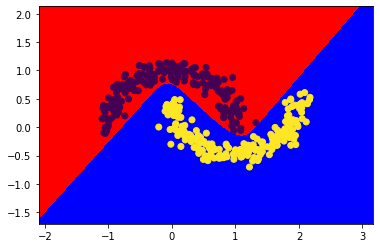

In [19]:
plotBoundary(lambda x : nn_predict(x, model))

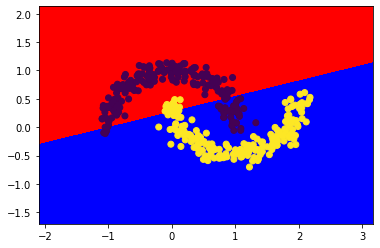

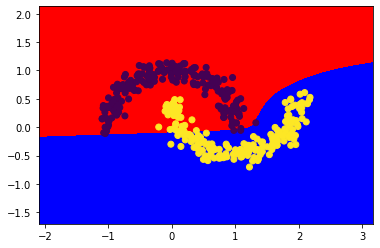

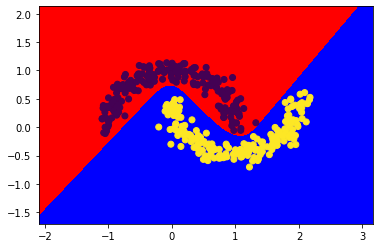

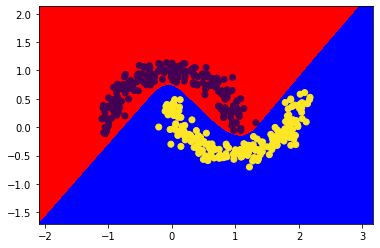

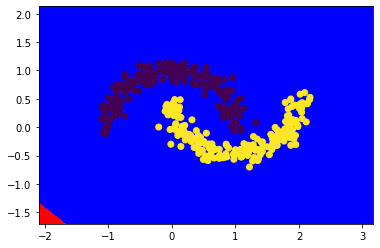

In [20]:
hidden_neurons = [1,3,5,10,50]
for neurons in hidden_neurons:
    model = build_model(input_neurons, neurons, output_neurons)
    plotBoundary(lambda x : nn_predict(x, model))